<a href="https://colab.research.google.com/github/xy259/LibreTV/blob/main/%E2%80%9CMDD7090_deeppurpose_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC%EF%BC%88%E5%89%AF%E6%9C%AC%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **药物发现AI实践教程 - DeepPurpose深度学习在药物研发中的应用**

zxy的code, 2025.12.5

MDD7090，教授：王曜峰；联系方式：yaofengwang@hkbu.edu.hk

实践目的：
==========
本实践旨在通过DeepPurpose库介绍深度学习在药物发现中的应用，特别是：
1. 学习如何使用深度学习模型预测小分子化合物与蛋白质靶点的结合亲和力
2. 掌握药物再利用（drug repurposing）的概念和实践方法
3. 理解虚拟筛选（virtual screening）在药物发现中的作用
4. 学习数据预处理、模型训练和结果可视化的完整流程

适用对象：
==========
- Python入门水平的药物发现硕士研究生
- 对AI在药物研发中应用感兴趣的研究人员
- 需要掌握计算药物学基础技能的学习者

实践原理：
==========
DeepPurpose是一个基于深度学习的药物发现工具包，主要原理包括：
1. 分子表示学习：使用图神经网络（MPNN）或传统分子描述符（RDKit）表示药物分子
2. 蛋白质表示学习：使用卷积神经网络（CNN）或序列模型表示蛋白质序列
3. 相互作用预测：通过深度神经网络学习分子-蛋白质的结合模式
4. 迁移学习：利用预训练模型进行新任务的快速适应

实践步骤：
==========
第一部分：环境配置和数据准备
1. 安装必要的Python包（RDKit, DeepPurpose等）
2. 导入所需模块和函数

第二部分：化合物活性预测模型训练
1. 加载新冠病毒3CL蛋白酶筛选数据（AID1706）
2. 数据预处理和编码
3. 模型配置和初始化
4. 模型训练和验证

第三部分：药物再利用预测
1. 加载Broad Repurposing Hub数据库
2. 使用训练好的模型进行预测
3. 结果分析和解读

第四部分：药物-靶点相互作用学习
1. 加载DAVIS数据集
2. 配置多模态编码器
3. 训练DTI（Drug-Target Interaction）模型

第五部分：虚拟筛选应用
1. 加载BindingDB数据
2. 进行大规模虚拟筛选
3. 结果可视化和评估


所需环境：
==========
- Python 3.7+
- PyTorch
- RDKit
- DeepPurpose
- Matplotlib, Seaborn (用于可视化)

注意事项：
==========
- 模型训练可能需要较长时间，建议在GPU环境下运行
- 数据下载可能需要网络连接
- 某些步骤包含大量计算，请耐心等待


# 第一部分：环境配置和依赖安装



In [1]:
# 安装RDKit：开源化学信息学工具包，用于分子操作和描述符计算
# RDKit提供了分子结构处理、描述符计算、相似性计算等功能
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 32.1 MB/s eta 0:00:00


In [2]:
# 安装descriptastorus：提供额外的分子描述符计算功能
# 支持计算各种二维和三维分子描述符
!pip install git+https://github.com/bp-kelley/descriptastorus

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-7q3h2bpr
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-7q3h2bpr
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0.3-py3-none-any.whl size=1082893 sha256=bf2f3770f5f13e5faf73edaba95799ac33946ea08e66f25f7c0e0995204b7393
  Stored in directory: /tmp/pip-ephem-wheel-cache-z978fq_6/wheels/69/35/be/6711ca7baad9068ecd0ddfe50b4474e29596ac80bf52010b13
Successfully built descriptastorus


In [3]:
# 安装DeepPurpose：深度学习药物发现工具包
# 提供药物-靶点相互作用预测、虚拟筛选等功能
!pip install DeepPurpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.6/280.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.6 MB/s eta 0:00:00
 

# 第二部分：模块导入和初始化

In [4]:
# 导入DeepPurpose的化合物预测模块
# CompoundPred用于训练预测化合物生物活性的模型
from DeepPurpose import CompoundPred as models

In [5]:
# 导入DeepPurpose的工具函数
# 包括数据处理、模型配置生成等实用函数
from DeepPurpose.utils import *

In [6]:
# 导入DeepPurpose的数据集加载模块
# 提供各种药物发现相关数据集的加载功能
from DeepPurpose.dataset import *

# 第三部分：使用新冠病毒3CL蛋白酶数据训练化合物预测模型

本部分使用AID1706数据集训练化合物对新冠病毒3CL蛋白酶的抑制活性预测模型
AID1706是PubChem中的一个筛选项目，测试了大量化合物对SARS-CoV-2 3CL蛋白酶的抑制作用

In [7]:
# 加载AID1706 SARS-CoV-2 3CL蛋白酶筛选数据
# 返回药物分子列表、靶点信息和活性标签
# X_drugs: 化合物SMILES字符串列表
# y: 对应的活性值（IC50或抑制百分比）
X_drugs, _, y = load_AID1706_SARS_CoV_3CL()

Beginning Processing...


/usr/local/lib/python3.12/dist-packages/DeepPurpose/dataset.py:364: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv(saved_path_data)
/usr/local/lib/python3.12/dist-packages/DeepPurpose/dataset.py:369: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydat

Default binary threshold for the binding affinity scores is 15, recommended by the investigator
Done!


In [8]:
# 查看药物数据的结构和内容
# 显示前几个化合物的SMILES表示
X_drugs

array(['CC1=C(SC(=N1)NC(=O)COC2=CC=CC=C2OC)C',
       'CC1=CC=C(C=C1)C(=O)NCCCN2CCOCC2',
       'CSC1=CC=C(C=C1)C(=O)NC2CCSC3=CC=CC=C23', ...,
       'C1=CC=C(C=C1)C(=O)C2=CC=CC=C2N=CC3=C(NC(=O)NC3=O)O',
       'CC1=C(C(=NO1)C2=CC=CC=C2Cl)C(=O)N3CCC(CC3)C(=O)OC',
       'CN1C2=C(C=C(C=C2)NC(=O)C3=CC=C(C=C3)OCC=C)N(C1=O)C'],
      dtype='<U179')

In [9]:
# 查看靶点信息（单靶点数据）
_

'SGFKKLVSPSSAVEKCIVSVSYRGNNLNGLWLGDSIYCPRHVLGKFSGDQWGDVLNLANNHEFEVVTQNGVTLNVVSRRLKGAVLILQTAVANAETPKYKFVKANCGDSFTIACSYGGTVIGLYPVTMRSNGTIRASFLAGACGSVGFNIEKGVVNFFYMHHLELPNALHTGTDLMGEFYGGYVDEEVAQRVPPDNLVTNNIVAWLYAAIISVKESSFSQPKWLESTTVSIEDYNRWASDNGFTPFSTSTAITKLSAITGVDVCKLLRTIMVKSAQWGSDPILGQYNFEDELTPESVFNQVGGVRLQ'

In [10]:
# 查看活性标签的分布
# y包含了每个化合物的生物活性测量值
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# 设置药物分子编码方式
# 'rdkit_2d_normalized'使用RDKit计算的二维分子描述符，并进行标准化
# 这种编码方式计算速度快，适合中小型数据集
drug_encoding = 'rdkit_2d_normalized'

In [12]:
# 数据预处理和分割
# 将原始数据转换为模型可用的格式，并分割为训练、验证和测试集
# split_method='random': 随机分割
# random_seed=1: 设置随机种子保证结果可重现
train, val, test = data_process(X_drug=X_drugs, y=y,
                                drug_encoding=drug_encoding,
                                split_method='random',
                                random_seed=1)

Drug Property Prediction Mode...
in total: 26640 drugs
encoding drug...
unique drugs: 13764
Done.


In [13]:
# 生成模型配置参数
# drug_encoding: 药物编码方式
# cls_hidden_dims: 分类器隐藏层维度
# train_epoch: 训练轮数
# LR: 学习率
# batch_size: 批次大小
config = generate_config(drug_encoding=drug_encoding,
                         cls_hidden_dims=[512],
                         train_epoch=5,
                         LR=0.001,
                         batch_size=128)

In [14]:
# 检查PyTorch是否可用GPU
# GPU加速可以显著提高训练速度
import torch
torch.cuda.is_available()

False

In [15]:
# 初始化深度学习模型
# 使用前面生成的配置参数创建模型实例
model = models.model_initialize(**config)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69304. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.45719. Total time 0.00055 hours
Validation at Epoch 1 , AUROC: 0.91268 , AUPRC: 0.90062 , F1: 0.82570
Training at Epoch 2 iteration 0 with loss 0.32739. Total time 0.00083 hours
Training at Epoch 2 iteration 100 with loss 0.15181. Total time 0.00166 hours
Validation at Epoch 2 , AUROC: 0.97974 , AUPRC: 0.97128 , F1: 0.93286
Training at Epoch 3 iteration 0 with loss 0.14610. Total time 0.00222 hours
Training at Epoch 3 iteration 100 with loss 0.10308. Total time 0.00277 hours
Validation at Epoch 3 , AUROC: 0.98959 , AUPRC: 0.98507 , F1: 0.96912
Training at Epoch 4 iteration 0 with loss 0.04067. Total time 0.00305 hours
Training at Epoch 4 iteration 100 with loss 0.11178. Total time 0.00388 hours
Validation at Epoch 4 , AUROC: 0.99025 , AUPRC: 0.98419 , F1: 0.96238
Training at Epoch 5 iteration 0 with loss 

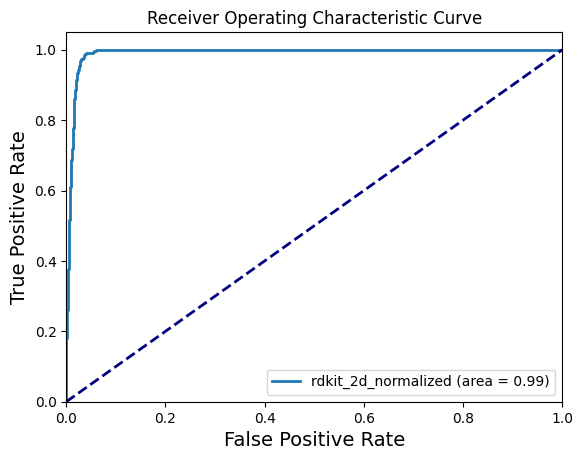

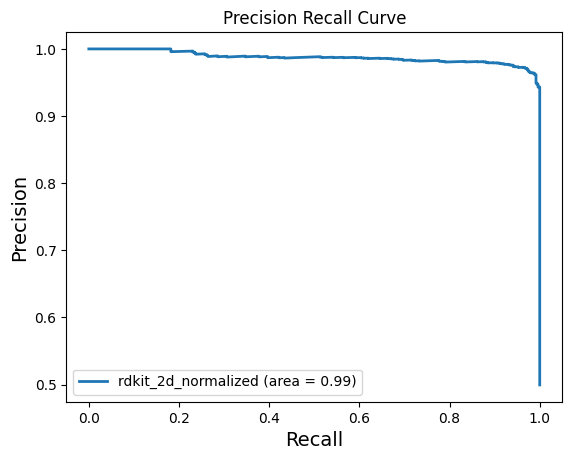

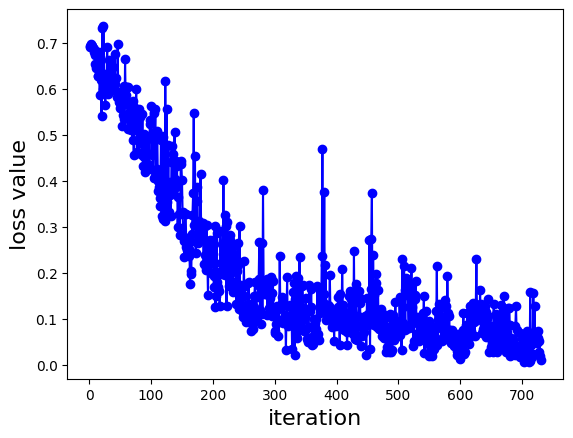

In [16]:
# 训练模型
# 使用训练集训练模型，并在验证集上监控性能
# 这个过程可能需要几分钟到几十分钟，取决于数据大小和计算资源
model.train(train, val, test)

# 第四部分：药物再利用（Drug Repurposing）预测

药物再利用是指寻找已上市药物的新适应症
这里使用Broad Repurposing Hub数据库中的临床阶段药物进行预测

In [17]:
# 加载Broad Repurposing Hub数据库
# 包含数千种临床阶段药物的信息
# 返回药物分子、名称和PubChem CID
X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub()

In [18]:
# 使用训练好的模型进行药物再利用预测
# 对所有Broad数据库中的药物预测其对3CL蛋白酶的抑制活性
# 返回预测结果，包括活性评分和排序
models.repurpose(X_repurpose, model, drug_name)


repurposing...
Drug Property Prediction Mode...
in total: 6111 drugs
encoding drug...
unique drugs: 6111
Done.
predicting...
---------------
Drug Repurposing Result
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------+
| Rank |                                                                                                                                                                                                        

[0.00027924447203986347,
 1.9554134269128554e-05,
 2.282242348883301e-05,
 0.6665704846382141,
 7.506568636017619e-06,
 0.00011995436216238886,
 7.006092346273363e-05,
 0.7060170769691467,
 1.927065386553295e-05,
 4.5310200221138075e-05,
 1.5047002307255752e-05,
 1.5047002307255752e-05,
 6.520706847368274e-06,
 3.833368737105047e-06,
 0.00032578507671132684,
 2.021350883296691e-05,
 1.5142727534112055e-06,
 7.81305498094298e-05,
 3.675919651868753e-05,
 0.00032165172160603106,
 0.0014288892270997167,
 7.999571607797407e-06,
 1.7266607983401627e-06,
 0.0014437077334150672,
 3.199049160684808e-06,
 0.7805821895599365,
 2.1395024305093102e-05,
 0.00048013313789851964,
 9.511207281320821e-06,
 0.0015462936135008931,
 0.0004103346145711839,
 2.2921843992662616e-05,
 0.08224158734083176,
 0.0012409106129780412,
 4.314743193845061e-07,
 0.0016889312537387013,
 9.410900383954868e-05,
 2.17749438888859e-05,
 3.598064722609706e-05,
 2.105196654156316e-05,
 0.000135813417728059,
 0.00128620921168

In [19]:
# 或者使用DAVIS数据集进行预测
# DAVIS数据集包含更全面的药物-靶点相互作用数据
X_repurpose, drug_name, drug_cid = load_process_DAVIS()
models.repurpose(X_repurpose, model, drug_name)

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
repurposing...
Drug Property Prediction Mode...
in total: 30056 drugs
encoding drug...
unique drugs: 68
Done.
predicting...
---------------
Drug Repurposing Result
+-------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

[0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.04148499295115471,
 0.0414849

# 第五部分：模型保存和加载

In [20]:
# 将训练好的模型保存到本地目录
# 模型文件可以后续重复使用，无需重新训练
model.save_model('./3CL_drugs_model')

In [21]:
# 从保存的模型文件加载预训练模型
# 用于后续预测或进一步分析
model = models.model_pretrained(path_dir='./3CL_drugs_model')

# 第六部分：药物-靶点相互作用（DTI）学习

本部分使用DAVIS数据集学习药物-靶点相互作用模式
DAVIS数据集包含大量实验测定的药物-蛋白质亲和力数据

In [22]:
# 导入药物-靶点相互作用模块
from DeepPurpose import DTI as models

In [23]:
# 重新导入工具函数（避免命名冲突）
from DeepPurpose import utils
from DeepPurpose import dataset

In [24]:
# 加载和处理DAVIS数据集
# path: 数据保存路径
# binary: 是否转换为二分类任务
# convert_to_log: 是否转换为对数尺度
# threshold: 活性阈值（nM）
X_drugs, X_targets, y = dataset.load_process_DAVIS(path='./data',
                                                   binary=False,
                                                   convert_to_log=True,
                                                   threshold=30)

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


In [25]:
# 显示数据集的基本信息
# 查看第一个药物分子的SMILES表示
print('Drug 1: ' + X_drugs[0])

Drug 1: CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N


In [26]:
# 查看第一个靶蛋白的氨基酸序列
print('Target 1: ' + X_targets[0])

Target 1: MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL


In [27]:
# 查看对应的亲和力值
print('Score 1: ' + str(y[0]))

Score 1: 7.366531544420414


In [28]:
# 查看完整的数据集结构
X_drugs  # 药物分子列表
X_targets  # 靶蛋白序列列表
y  # 亲和力值列表

array([7.36653154, 5.        , 5.        , ..., 5.7212464 , 5.35654732,
       5.        ])

In [29]:
# 设置编码方式
# drug_encoding='MPNN': 使用消息传递神经网络编码药物分子结构
# target_encoding='CNN': 使用卷积神经网络编码蛋白质序列
drug_encoding, target_encoding = 'MPNN', 'CNN'

In [30]:
# 数据预处理和分割
# 处理药物和靶点的配对数据
train, val, test = utils.data_process(X_drugs, X_targets, y,
                                      drug_encoding, target_encoding,
                                      split_method='random',
                                      frac=[0.7, 0.1, 0.2],
                                      random_seed=1)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


In [31]:
# 生成DTI模型配置
# drug_encoding: 药物编码方式
# target_encoding: 靶点编码方式
# cls_hidden_dims: 分类器隐藏层维度
# train_epoch: 训练轮数（课堂演示使用1个epoch）
# LR: 学习率
# batch_size: 批次大小
# hidden_dim_drug: 药物编码器隐藏维度
# mpnn_hidden_size: MPNN隐藏层大小
# mpnn_depth: MPNN层数
# cnn_target_filters: CNN卷积核数量
# cnn_target_kernels: CNN卷积核大小
config = utils.generate_config(drug_encoding=drug_encoding,
                               target_encoding=target_encoding,
                               cls_hidden_dims=[1024, 1024, 512],
                               train_epoch=2,
                               LR=0.001,
                               batch_size=128,
                               hidden_dim_drug=128,
                               mpnn_hidden_size=128,
                               mpnn_depth=3,
                               cnn_target_filters=[32, 64, 96],
                               cnn_target_kernels=[4, 8, 12])


In [32]:
# 初始化DTI模型
model = models.model_initialize(**config)


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.3014. Total time 0.00111 hours
Training at Epoch 1 iteration 100 with loss 0.88686. Total time 0.13444 hours
Validation at Epoch 1 with loss:0.37528, MSE: 0.75980 , Pearson Correlation: 0.27816 with p-value: 1.53E-54 , Concordance Index: 0.63513
Training at Epoch 2 iteration 0 with loss 0.82127. Total time 0.23472 hours
Training at Epoch 2 iteration 100 with loss 0.71617. Total time 0.36805 hours
Validation at Epoch 2 with loss:0.75638, MSE: 0.72430 , Pearson Correlation: 0.34393 with p-value: 3.18E-84 , Concordance Index: 0.68239
Training at Epoch 3 iteration 0 with loss 0.64638. Total time 0.46638 hours
Training at Epoch 3 iteration 100 with loss 0.71980. Total time 0.60055 hours
Validation at Epoch 3 with loss:0.52621, MSE: 0.71300 , Pearson Correlation: 0.38895 with p-value: 3.72E-109 , Concordance Index: 0.70574
--- Go for Testing ---
Testing MSE: 0.7225679318486876 , Pea

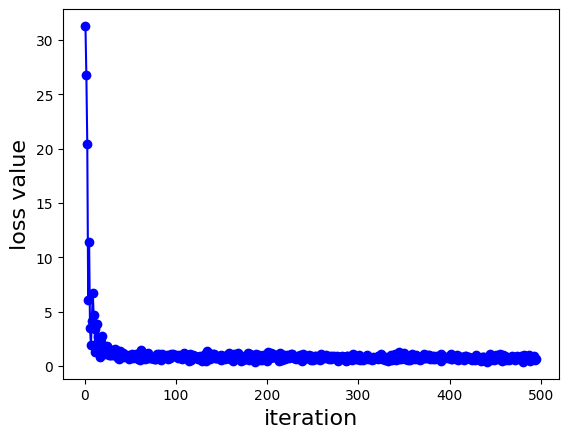

In [33]:
# 训练DTI模型
# 学习药物分子和蛋白质序列之间的相互作用模式
model.train(train, val, test)

In [34]:
# 保存训练好的DTI模型
model.save_model('./DAVIS_model')

In [35]:
# 加载预训练的DTI模型
model = models.model_pretrained(path_dir='./DAVIS_model')

# 第七部分：靶点预测和药物再利用

In [36]:
# 加载SARS-CoV-2 3CL蛋白酶序列作为预测靶点
target, target_name = dataset.load_SARS_CoV2_Protease_3CL()

In [37]:
# 加载抗病毒药物数据库作为候选药物
repurpose_drugs, repurpose_drugs_name, repurpose_drugs_pubchem_cid = dataset.load_antiviral_drugs()

In [38]:
# 使用训练好的DTI模型进行药物再利用预测
# 预测抗病毒药物对SARS-CoV-2 3CL蛋白酶的亲和力
# result_folder: 结果保存目录
# convert_y: 是否转换预测值为实验尺度
y_pred = models.repurpose(X_repurpose=repurpose_drugs,
                          target=target,
                          model=model,
                          drug_names=repurpose_drugs_name,
                          target_name=target_name,
                          result_folder="./result/",
                          convert_y=True)


repurposing...
Drug Target Interaction Prediction Mode...
in total: 82 drug-target pairs
encoding drug...
unique drugs: 81
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV2 3CL Protease
+------+----------------------+------------------------+---------------+
| Rank |      Drug Name       |      Target Name       | Binding Score |
+------+----------------------+------------------------+---------------+
|  1   |      Foscarnet       | SARS-CoV2 3CL Protease |    1150.35    |
|  2   |      Sofosbuvir      | SARS-CoV2 3CL Protease |    1324.49    |
|  3   |      Boceprevir      | SARS-CoV2 3CL Protease |    1482.57    |
|  4   |     Rimantadine      | SARS-CoV2 3CL Protease |    1565.16    |
|  5   |      Peramivir       | SARS-CoV2 3CL Protease |    1567.46    |
|  6   |      Edoxudine       | SARS-CoV2 3CL Protease |    1599.46    |
|  7   |      Telaprevir      | SARS-CoV2 3CL Protease |    1603.45    |
|  8   |     O

#第八部分：虚拟筛选（Virtual Screening）

虚拟筛选使用计算模型从大规模化合物库中筛选潜在活性化合物
这里使用BindingDB的IC50数据进行演示

In [39]:
# 加载BindingDB中的样本数据
# 包含1000个药物-靶点相互作用样本
target, drugs = dataset.load_IC50_1000_Samples()

Downloading...


In [40]:
# 使用DTI模型进行虚拟筛选
# 从药物库中筛选与给定靶点有潜在相互作用的化合物
y_pred = models.virtual_screening(drugs, target, model)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 100 drug-target pairs
encoding drug...
unique drugs: 100
encoding protein...
unique target sequence: 93
Done.
predicting...
---------------
Virtual Screening Result
+------+-----------+-------------+---------------+
| Rank | Drug Name | Target Name | Binding Score |
+------+-----------+-------------+---------------+
|  1   |  Drug 99  |  Target 99  |      6.25     |
|  2   |  Drug 76  |  Target 76  |      6.24     |
|  3   |  Drug 90  |  Target 90  |      6.13     |
|  4   |  Drug 12  |  Target 12  |      6.11     |
|  5   |  Drug 50  |  Target 50  |      6.02     |
|  6   |  Drug 80  |  Target 80  |      5.80     |
|  7   |  Drug 71  |  Target 71  |      5.79     |
|  8   |  Drug 36  |  Target 36  |      5.79     |
|  9   |  Drug 85  |  Target 85  |      5.71     |
|  10  |  Drug 15  |  Target 15  |      5.71     |
checkout ./result/virtual_screening.txt for the whole list



# 第九部分：结果可视化和分析

In [41]:
# 导入可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# 设置matplotlib支持中文显示（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [42]:
# 示例数据准备 - 已知靶点活性对比
# known_targets: 已知的靶点活性数据
known_targets = {'RdRp': 0.85, 'NS5 RNA聚合酶': 0.89}

In [43]:
# predicted_scores: 模型预测的靶点评分
predicted_scores = {'RdRp': 0.8456, 'NS5 RNA聚合酶': 0.8912, 'ACE2': 0.7634}

/tmp/ipython-input-3863815833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(predicted_scores.keys()),
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDE

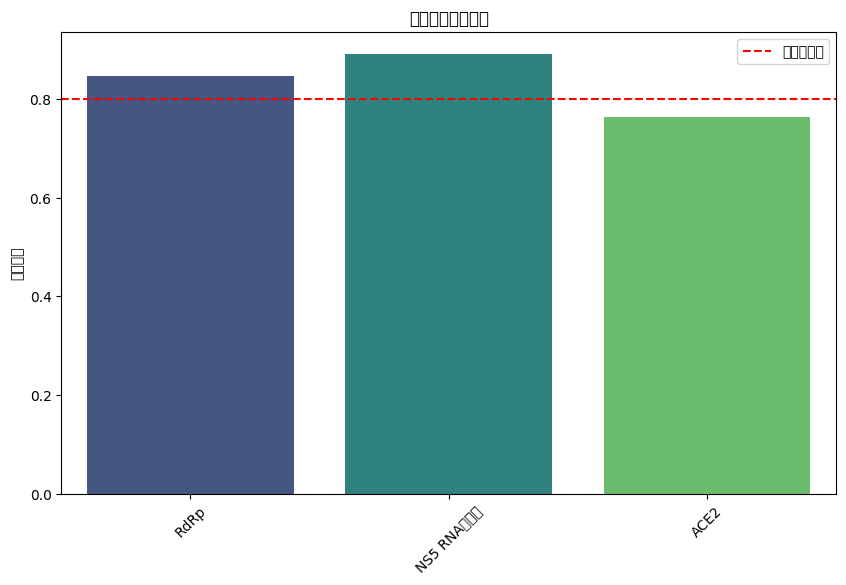

In [44]:
# 创建靶点预测评分分布图
plt.figure(figsize=(10, 6))
sns.barplot(x=list(predicted_scores.keys()),
            y=list(predicted_scores.values()),
            palette='viridis')
# 添加显著性阈值线
plt.axhline(y=0.8, color='r', linestyle='--', label='显著性阈值')

# 设置图表标题和标签
plt.title('靶点预测评分分布')
plt.ylabel('预测评分')
plt.xticks(rotation=45)
plt.legend()

# 显示图表
plt.show()

# 第十部分：模型评估 - 混淆矩阵示例

In [45]:
# 导入sklearn的混淆矩阵计算函数
from sklearn.metrics import confusion_matrix

In [ ]:
# 准备示例真实标签和预测标签
# y_true: 真实标签（1=正例靶点，0=负例靶点）
y_true = [1, 1, 0]

# y_pred: 模型预测标签
y_pred = [1, 0, 1]

In [ ]:
# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

In [ ]:
# 使用seaborn绘制热力图
sns.heatmap(cm, annot=True, fmt='d')

# 设置轴标签和标题
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')

# 显示混淆矩阵
plt.show()

# 实践总结

通过本教程学习：

1. DeepPurpose库的基本使用方法
2. 如何训练化合物活性预测模型
3. 药物再利用预测的实施过程
4. 药物-靶点相互作用学习的原理和方法
5. 虚拟筛选在药物发现中的应用
6. 结果的可视化和评估方法

关键要点：
- 模型训练需要大量计算资源，建议使用GPU
- 数据质量直接影响模型性能
- 虚拟筛选可以显著加速药物发现过程
- 结果需要实验验证，不可直接用于临床决策

进一步学习建议：
1. 尝试不同的编码方式和模型架构
2. 使用更大的数据集进行训练
3. 探索其他药物发现相关的深度学习方法
4. 学习分子对接和分子动力学模拟等 complementary 方法